# Découverte de la classification avec la technique des SVM

Lino Galiana  
2025-03-19

<div class="badge-container"><div class="badge-text">Pour essayer les exemples présents dans ce tutoriel :</div><a href="https://github.com/linogaliana/python-datascientist-notebooks/blob/main/notebooks/modelisation/2_classification.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/static/v1?logo=github&label=&message=View%20on%20GitHub&color=181717" alt="View on GitHub"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/vscode-python?autoLaunch=true&name=«2_classification»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-vscode.sh»&init.personalInitArgs=«modelisation%202_classification%20correction»" target="_blank" rel="noopener"><img src="https://custom-icon-badges.demolab.com/badge/SSP%20Cloud-Lancer_avec_VSCode-blue?logo=vsc&logoColor=white" alt="Onyxia"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/jupyter-python?autoLaunch=true&name=«2_classification»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-jupyter.sh»&init.personalInitArgs=«modelisation%202_classification%20correction»" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSP%20Cloud-Lancer_avec_Jupyter-orange?logo=Jupyter&logoColor=orange" alt="Onyxia"></a>
<a href="https://colab.research.google.com/github/linogaliana/python-datascientist-notebooks-colab//blob/main//notebooks/modelisation/2_classification.ipynb" target="_blank" rel="noopener"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a><br></div>

# 1. Introduction

Ce chapitre vise à présenter de manière très succincte le principe de l’entraînement de modèles dans un cadre de classification. L’objectif est d’illustrer la démarche à partir d’un algorithme dont le principe est assez intuitif. Il s’agit d’illustrer quelques uns des concepts évoqués dans les chapitres précédents, notamment ceux relatifs à l’entraînement d’un modèle. D’autres cours de votre scolarité vous permettront de découvrir d’autres algorithmes de classification et les limites de chaque technique.

## 1.1 Données

Ce chapitre utilise toujours le même jeu de données, présenté dans l’[introduction
de cette partie](index.qmd) : les données de vote aux élections présidentielles américaines
croisées à des variables sociodémographiques.
Le code
est disponible [sur Github](https://github.com/linogaliana/python-datascientist/blob/main/content/modelisation/get_data.py).

In [1]:
!pip install --upgrade xlrd #colab bug verson xlrd
!pip install geopandas

In [2]:
import pandas as pd

In [3]:
import requests

url = 'https://raw.githubusercontent.com/linogaliana/python-datascientist/main/content/modelisation/get_data.py'
r = requests.get(url, allow_redirects=True)
open('getdata.py', 'wb').write(r.content)

import getdata
votes = getdata.create_votes_dataframes()

## 1.2 La méthode des *SVM* (*Support Vector Machines*)

Les SVM (*Support Vector Machines*) font partie de la boîte à outil traditionnelle des *data scientists*.
Le principe de cette technique est relativement intuitif grâce à son interprétation géométrique.
Il s’agit de trouver une droite, avec des marges (les supports) qui discrimine au mieux le nuage de points de nos données.
Bien-sûr, dans la vraie vie, il est rare d’avoir des nuages de points bien ordonnés pour pouvoir les séparer par une droite. Mais une projection adéquate (un noyau ou *kernel*) peut arranger des données pour permettre de discriminer les données.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-lightbulb"></i> Formalisation mathématique</h3>

Les SVM sont l’une des méthodes de *machine learning* les plus intuitives
du fait de l’interprétation géométrique simple de la méthode. Il s’agit
aussi d’un des algorithmes de *machine learning* à la formalisation
la moins complexe pour les praticiens ayant des notions en statistique
traditionnelle. Cette note revient dessus. Néanmoins,
celle-ci n’est pas nécessaire à la compréhension du chapitre.
En *machine learning*, plus que les détails mathématiques, l’important
est d’avoir des intuitions.

L’objectif des SVM est, rappelons-le, de trouver un hyperplan qui permette
de séparer les différentes classes au mieux. Par exemple, dans un espace
à deux dimensions, il s’agit de trouver une droite avec des marges
qui permette de séparer au mieux l’espace en partie avec
des *labels* homogènes.

On peut, sans perdre de généralité,
supposer que le problème consiste à supposer l’existence d’une loi de probabilité $\mathbb{P}(x,y)$ ($\mathbb{P} \to \{-1,1\}$) qui est inconnue. Le problème de discrimination
vise à construire un estimateur de la fonction de décision idéale qui minimise la probabilité d’erreur. Autrement dit

</div>

# 2. Application

Pour appliquer un modèle de classification, il nous faut
trouver une variable dichotomique. Le choix naturel est
de prendre la variable dichotomique qu’est la victoire ou
défaite d’un des partis.

Même si les Républicains ont perdu en 2020, ils l’ont emporté
dans plus de comtés (moins peuplés). Nous allons considérer
que la victoire des Républicains est notre *label* 1 et la défaite *0*.

In [4]:
from sklearn import svm
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 1 : Premier algorithme de classification</h3>

1.  Créer une variable *dummy* appelée `y` dont la valeur vaut 1 quand les républicains l’emportent.
2.  En utilisant la fonction prête à l’emploi nommée `train_test_split` de la librairie `sklearn.model_selection`,
    créer des échantillons de test (20 % des observations) et d’estimation (80 %) avec comme *features* : `'Unemployment_rate_2019', 'Median_Household_Income_2021', 'Percent of adults with less than a high school diploma, 2018-22', "Percent of adults with a bachelor's degree or higher, 2018-22"` et comme *label* la variable `y`.

*Note: Il se peut que vous ayez le warning suivant :*

> A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

*Note : Pour éviter ce warning à chaque fois que vous estimez votre modèle, vous pouvez utiliser `DataFrame[['y']].values.ravel()` plutôt que `DataFrame[['y']]` lorsque vous constituez vos échantillons.*

1.  Entraîner un classifieur SVM avec comme paramètre de régularisation `C = 1`. Regarder les mesures de performance suivante : `accuracy`, `f1`, `recall` et `precision`.

2.  Vérifier la matrice de confusion : vous devriez voir que malgré des scores en apparence pas si mauvais, il y a un problème notable.

3.  Refaire les questions précédentes avec des variables normalisées. Le résultat est-il différent ?

4.  Changer de variables *x*. Utiliser uniquement le résultat passé du vote démocrate (année 2016) et le revenu. Les variables en question sont `share_2016_republican` et `Median_Household_Income_2021`. Regarder les résultats, notamment la matrice de confusion.

5.  \[OPTIONNEL\] Faire une 5-fold validation croisée pour déterminer le paramètre *C* idéal.

</div>

In [5]:
# 1. Création de la dummy y de victoire des républicains
votes['y'] = (votes['votes_gop'] > votes['votes_dem']).astype(int)

In [6]:
#2. Création des échantillons d'entraînement et de validation
xvars = [
  'Unemployment_rate_2019', 'Median_Household_Income_2021',
  'Percent of adults with less than a high school diploma, 2018-22',
  "Percent of adults with a bachelor's degree or higher, 2018-22"
]



df = votes.loc[:, ["y"] + xvars]
df = df.dropna()

X_train, X_test, y_train, y_test = train_test_split(
    df[xvars],
    df[['y']].values.ravel(), test_size=0.2, random_state=123
)

On obtient donc un ensemble de *features* d’entraînement ayant cette forme:

In [7]:
X_train.head()

Et les *labels* associés sont les suivants:

In [8]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [9]:
# 3. Entraînement du modèle et performances
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)

sc_accuracy = sklearn.metrics.accuracy_score(y_pred, y_test)
sc_f1 = sklearn.metrics.f1_score(y_pred, y_test)
sc_recall = sklearn.metrics.recall_score(y_pred, y_test)
sc_precision = sklearn.metrics.precision_score(y_pred, y_test)

In [10]:
stats_perf = pd.DataFrame.from_dict(
  {
    "Accuracy": [sc_accuracy], "Recall": [sc_recall],
    "Precision": [sc_precision], "F1": [sc_f1]
  }, orient = "index", columns = ["Score"]
)

A l’issue de la question 3, notre classifieur manque totalement les labels 0, qui sont minoritaires. Parmi les raisons possibles : l’échelle des variables. Le revenu, notamment, a une distribution qui peut écraser celle des autres variables, dans un modèle linéaire. Il faut donc, a minima, standardiser les variables, ce qui est l’objet de la question 4.

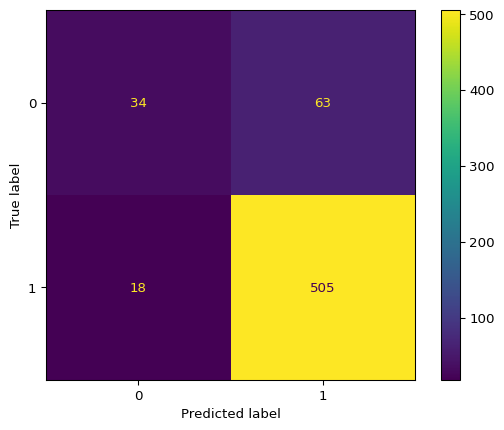

In [11]:
import matplotlib.pyplot as plt

# 4. Matrice de confusion
predictions = clf.predict(X_test)
cm = sklearn.metrics.confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = sklearn.metrics.ConfusionMatrixDisplay(
            confusion_matrix=cm,
            display_labels=clf.classes_
       )
disp.plot()
plt.show()

Standardiser les variables n’apporte finalement pas de gain :

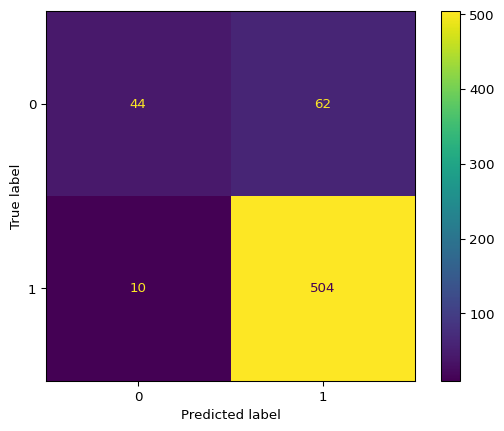

In [12]:
import sklearn.preprocessing as preprocessing

X = df.loc[:, xvars]
y = df[['y']]
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y.values.ravel(), test_size=0.2, random_state=0
)

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
predictions = clf.predict(X_test)
cm = sklearn.metrics.confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = sklearn.metrics.ConfusionMatrixDisplay(
  confusion_matrix=cm,
  display_labels=clf.classes_
)
disp.plot()
plt.show()

Il faut donc aller plus loin : le problème ne vient pas de l’échelle mais du choix des variables. C’est pour cette raison que l’étape de sélection de variables est cruciale et qu’un chapitre y est consacré.

À l’issue de la question 6, le nouveau classifieur devrait avoir les performances suivantes :

``` python
out = pd.DataFrame.from_dict(
  {
    "Accuracy": [sc_accuracy], "Recall": [sc_recall],
    "Precision": [sc_precision], "F1": [sc_f1]
  }, orient = "index", columns = ["Score"]
)
```

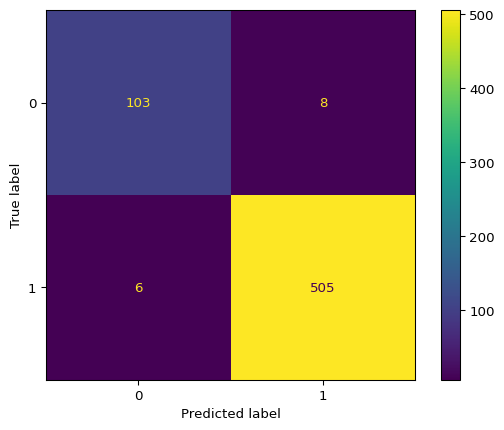

In [14]:
# Question 6
votes['y'] = (votes['votes_gop'] > votes['votes_dem']).astype(int)
df = votes[["y", "share_2016_republican", 'Median_Household_Income_2021']]
tempdf = df.dropna(how = "any")

X = votes[['share_2016_republican', 'Median_Household_Income_2021']]
y = tempdf[['y']]
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y.values.ravel(), test_size=0.2, random_state=0
)

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)

sc_accuracy = sklearn.metrics.accuracy_score(y_pred, y_test)
sc_f1 = sklearn.metrics.f1_score(y_pred, y_test)
sc_recall = sklearn.metrics.recall_score(y_pred, y_test)
sc_precision = sklearn.metrics.precision_score(y_pred, y_test)

predictions = clf.predict(X_test)
cm = sklearn.metrics.confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = sklearn.metrics.ConfusionMatrixDisplay(
            confusion_matrix=cm,
            display_labels=clf.classes_
       )
disp.plot()

plt.savefig("confusion_matrix3.png")